## TASK 3


# Pizza Place Sales Analysis
## A Comprehensive Analysis of Pizza Sales Data

**Objective:** Analyze pizza sales data to derive business insights and recommendations.

**By:** Jalloh Mohamed Lamarana

In [59]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


#visualization style
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline


In [5]:
#Importing Data sets

from google.colab import files
uploaded = files.upload()


In [6]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv')


In [7]:
orders.head()

,order_id,date,time
0,1,1/1/2015,11:38:36
1,2,1/1/2015,11:57:40
2,3,1/1/2015,12:12:28
3,4,1/1/2015,12:16:31
4,5,1/1/2015,12:21:30


In [8]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [9]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [10]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


# **Joinig the datasets**

- order_details ↔ pizzas (by pizza_id)

- pizzas ↔ pizza_types (by pizza_type_id)

- orders ↔ order_details (by order_id)

In [11]:
merged_df = pd.merge(order_details, pizzas, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_types, on='pizza_type_id')
merged_df = pd.merge(merged_df, orders, on='order_id')


In [12]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1/1/2015,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1/1/2015,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",1/1/2015,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1/1/2015,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1/1/2015,11:57:40


In [13]:
merged_df.shape

(48620, 12)

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  date              48620 non-null  object 
 11  time              48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [15]:
merged_df.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
pizza_type_id,0
size,0
price,0
name,0
category,0
ingredients,0


Total Price Column

In [16]:
merged_df['total_price'] = merged_df['quantity'] * merged_df['price']


In [17]:
total_price = merged_df['total_price']
total_price

,total_price
0,13.25
1,16.00
2,18.50
3,20.75
4,16.00
...,...
48615,16.75
48616,17.95
48617,12.00
48618,20.25


In [23]:
merged_df[['quantity','price','total_price']].head()


,quantity,price,total_price
0,1,13.25,13.25
1,1,16.00,16.00
2,1,18.50,18.50
3,1,20.75,20.75
4,1,16.00,16.00


In [19]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

merged_df.date

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
48615,2015-12-31
48616,2015-12-31
48617,2015-12-31
48618,2015-12-31


In [24]:
merged_df['order_hour'] = merged_df['time'].str.split(':').str[0]

merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11


In [25]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11


In [27]:

merged_df['month'] = merged_df['date'].dt.month_name()

In [28]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour,month
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11,January
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11,January
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11,January
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11,January
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11,January


In [29]:
merged_df.tail()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour,month
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31,21:23:10,16.75,21,December
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31,21:23:10,17.95,21,December
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31,21:23:10,12.00,21,December
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31,22:09:54,20.25,22,December
48619,48620,21350,bbq_ckn_s,1,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",2015-12-31,23:02:05,12.75,23,December


In [30]:
merged_df['order_day'] = merged_df['date'].dt.day_name()

In [32]:
merged_df[['date','time','order_hour']].head()

,date,time,order_hour
0,2015-01-01,11:38:36,11
1,2015-01-01,11:57:40,11
2,2015-01-01,11:57:40,11
3,2015-01-01,11:57:40,11
4,2015-01-01,11:57:40,11


In [33]:
merged_df.columns


Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'pizza_type_id',
       'size', 'price', 'name', 'category', 'ingredients', 'date', 'time',
       'total_price', 'order_hour', 'month', 'order_day'],
      dtype='object')

In [34]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour,month,order_day
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11,January,Thursday
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11,January,Thursday
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11,January,Thursday
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11,January,Thursday
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11,January,Thursday


In [35]:
merged_df[['date','order_day','month','order_hour','total_price']].head(30)


,date,order_day,month,order_hour,total_price
0,2015-01-01,Thursday,January,11,13.25
1,2015-01-01,Thursday,January,11,16.00
2,2015-01-01,Thursday,January,11,18.50
3,2015-01-01,Thursday,January,11,20.75
4,2015-01-01,Thursday,January,11,16.00
5,2015-01-01,Thursday,January,11,20.75
6,2015-01-01,Thursday,January,12,16.50
7,2015-01-01,Thursday,January,12,20.75
8,2015-01-01,Thursday,January,12,16.50
9,2015-01-01,Thursday,January,12,16.50


In [36]:
merged_df[['date','order_day','month','order_hour','total_price']].sample(n=10)


,date,order_day,month,order_hour,total_price
27124,2015-07-18,Saturday,July,19,16.00
43710,2015-11-24,Tuesday,November,17,25.50
34522,2015-09-12,Saturday,September,13,16.50
30515,2015-08-13,Thursday,August,13,12.50
29754,2015-08-07,Friday,August,21,14.50
4026,2015-01-31,Saturday,January,13,40.50
10255,2015-03-17,Tuesday,March,14,16.25
27292,2015-07-20,Monday,July,13,11.00
1733,2015-01-13,Tuesday,January,17,12.25
12752,2015-04-04,Saturday,April,18,16.00


In [37]:
merged_df.to_csv('final_merged_dataset.csv', index=False)


In [38]:
from google.colab import files
files.download('final_merged_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
#Importing the merged Dataset

from google.colab import files
uploaded = files.upload()

Saving final_merged_dataset.csv to final_merged_dataset (1).csv


In [40]:
df= pd.read_csv ('/content/final_merged_dataset.csv')

In [41]:
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour,month,order_day
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11,January,Thursday
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11,January,Thursday
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11,January,Thursday
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11,January,Thursday
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11,January,Thursday


  ## ANSWERS TO THE QUESTIONS

1. Total revenue

In [45]:
total_revenue = df['total_price'].sum()
total_revenue


np.float64(817860.05)

2. Total Quantity Sold

In [46]:
df['quantity'].sum()


np.int64(49574)

3. Total Orders

In [47]:
df['order_id'].nunique()


21350

4. Types of Pizza

In [48]:
df['pizza_type_id'].nunique()


32

5. Average Pizza price

In [49]:
df['price'].mean()


np.float64(16.494132044426163)

6. Peak Hours of Sales

In [53]:
df['revenue'] = df['quantity'] * df['price']


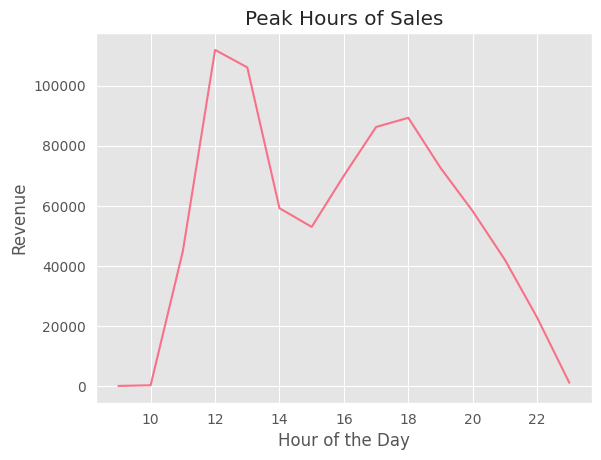

In [60]:
peak_hours = df.groupby('order_hour')['revenue'].sum()

peak_hours.plot()

plt.title('Peak Hours of Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue')

plt.show()


7. Sales by Day of the week

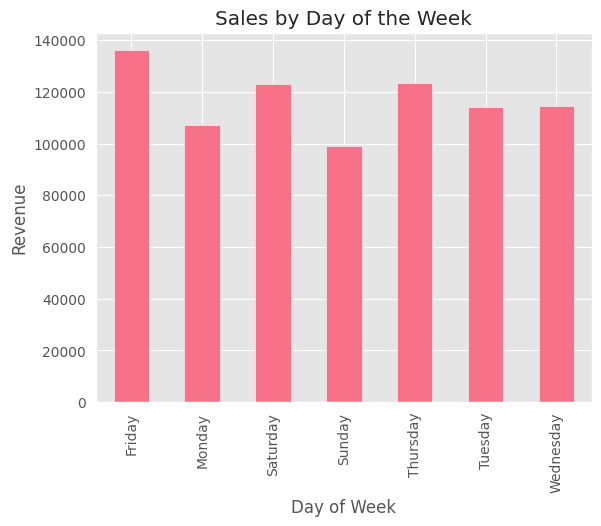

In [64]:
sales_day = df.groupby('order_day')['revenue'].sum()

sales_day.plot(kind='bar')

plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')

plt.show()


8. op 5 Bestselling Pizzas

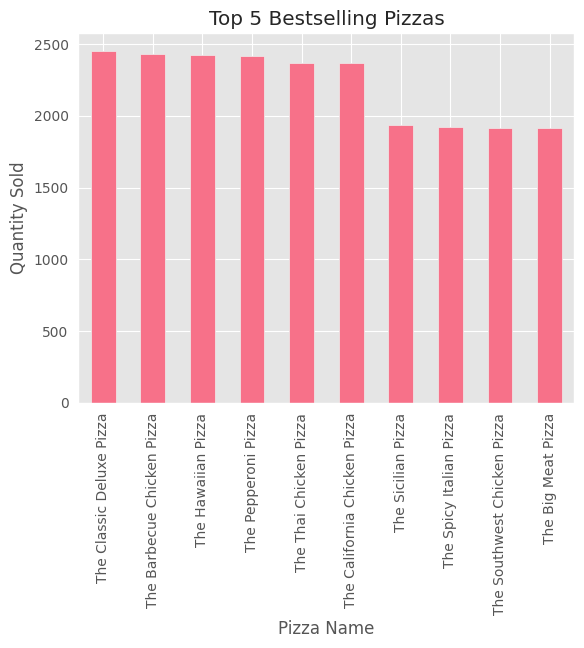

In [68]:
top5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.title('Top 5 Bestselling Pizzas')
top5.plot(kind='bar')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')

plt.show()


9. Monthly Sales Trend

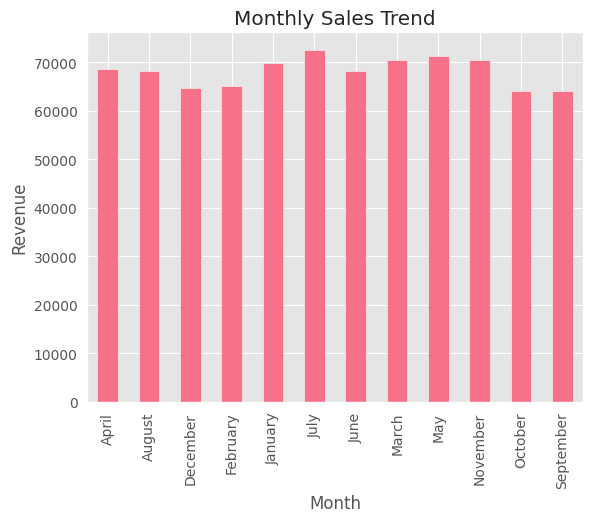

In [65]:
sales_month = df.groupby('month')['revenue'].sum()
sales_month.plot(kind='bar')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


10. Worst Performing Pizzas

In [67]:
worst = df.groupby('name')['quantity'].sum().sort_values().head(10)
worst


,quantity
name,
The Brie Carre Pizza,490
The Mediterranean Pizza,934
The Calabrese Pizza,937
The Spinach Supreme Pizza,950
The Soppressata Pizza,961
The Spinach Pesto Pizza,970
The Chicken Pesto Pizza,973
The Italian Vegetables Pizza,981
The Chicken Alfredo Pizza,987


Most Popular Pizza Size

In [69]:
df.groupby('size')['quantity'].sum().sort_values(ascending=False)


,quantity
size,
L,18956
M,15635
S,14403
XL,552
XXL,28


Orders per Hour (Customer traffic)

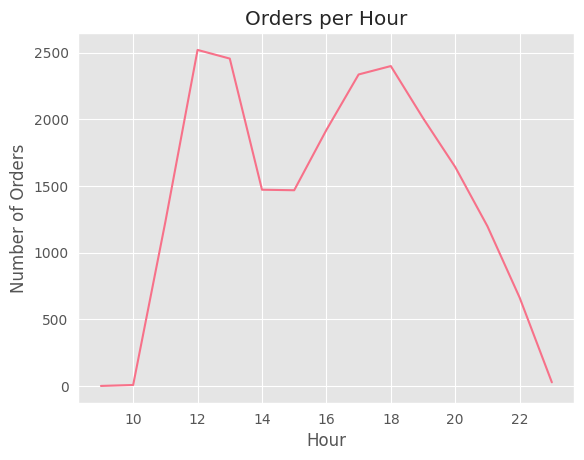

In [71]:
df.groupby('order_hour')['order_id'].nunique().plot()

plt.title('Orders per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()


Revenue by Pizza Category

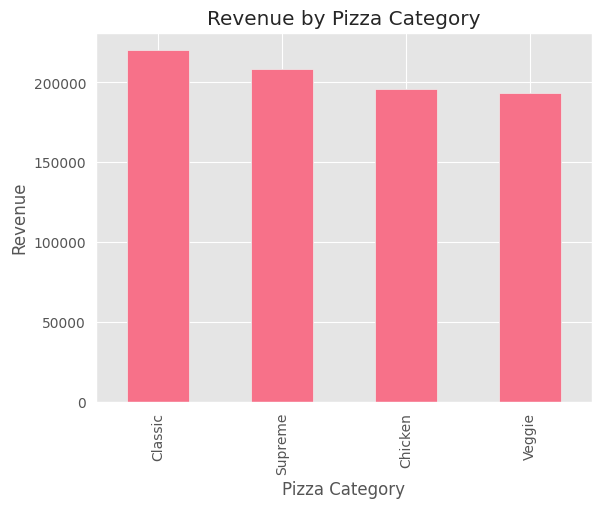

,revenue
category,
Classic,220053.10
Supreme,208197.00
Chicken,195919.50
Veggie,193690.45


In [73]:
cat_rev = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

cat_rev.plot(kind='bar')

plt.title('Revenue by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.show()

cat_rev


Revenue vs Quantity

In [74]:
pizza_perf = df.groupby('name').agg({
    'quantity':'sum',
    'revenue':'sum'
}).sort_values(by='revenue', ascending=False)

pizza_perf.head(10)


,quantity,revenue
name,,
The Thai Chicken Pizza,2371,43434.25
The Barbecue Chicken Pizza,2432,42768.00
The California Chicken Pizza,2370,41409.50
The Classic Deluxe Pizza,2453,38180.50
The Spicy Italian Pizza,1924,34831.25
The Southwest Chicken Pizza,1917,34705.75
The Italian Supreme Pizza,1884,33476.75
The Hawaiian Pizza,2422,32273.25
The Four Cheese Pizza,1902,32265.70


Average Revenue per Order by Hour

In [77]:
avg_hour = df.groupby('order_hour')['revenue'].mean()

avg_hour


,revenue
order_hour,
9,20.750000
10,17.861765
11,16.817290
12,17.098869
13,17.099097
14,16.813803
15,16.716814
16,16.739642
17,16.767927


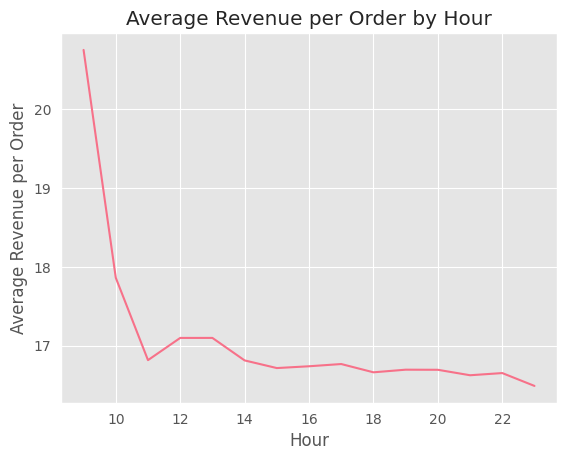

In [78]:
avg_hour.plot()

plt.title('Average Revenue per Order by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Revenue per Order')
plt.show()

Number of orders per day (customer trafic)

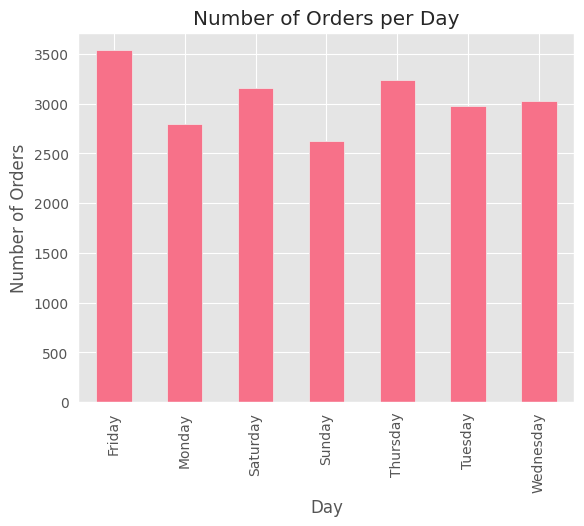

In [81]:
orders_day = df.groupby('order_day')['order_id'].nunique()

orders_day.plot(kind='bar')

plt.title('Number of Orders per Day')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.show()


Monthly Order Count

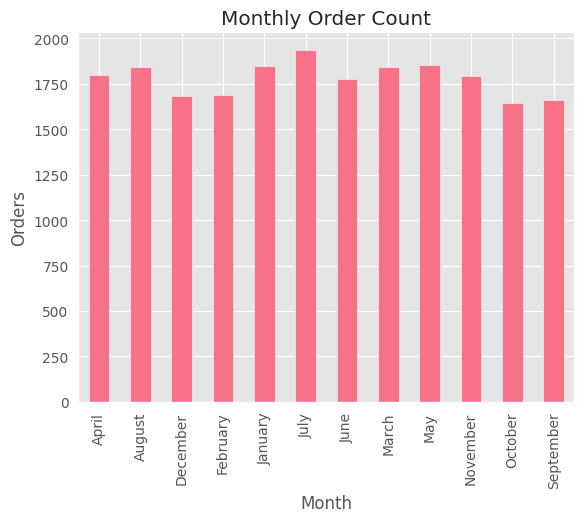

In [82]:
orders_month = df.groupby('month')['order_id'].nunique()

orders_month.plot(kind='bar')

plt.title('Monthly Order Count')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.show()


Top 5 Revenue Generating Pizzas

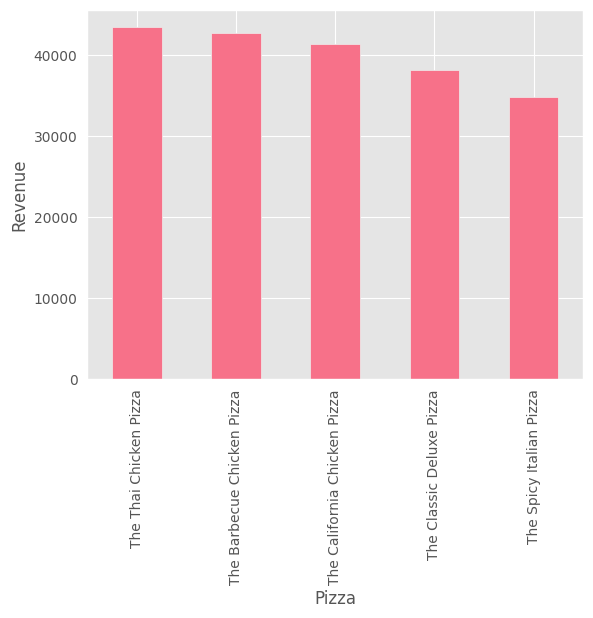

In [83]:
top_rev = df.groupby('name')['revenue'].sum().sort_values(ascending=False).head(5)

top_rev.plot(kind='bar')
plt.xlabel('Pizza')
plt.ylabel('Revenue')
plt.show()


Least Revenue Generating Pizzas

In [84]:
low_rev = df.groupby('name')['revenue'].sum().sort_values().head(5)
low_rev


,revenue
name,
The Brie Carre Pizza,11588.50
The Green Garden Pizza,13955.75
The Spinach Supreme Pizza,15277.75
The Mediterranean Pizza,15360.50
The Spinach Pesto Pizza,15596.00


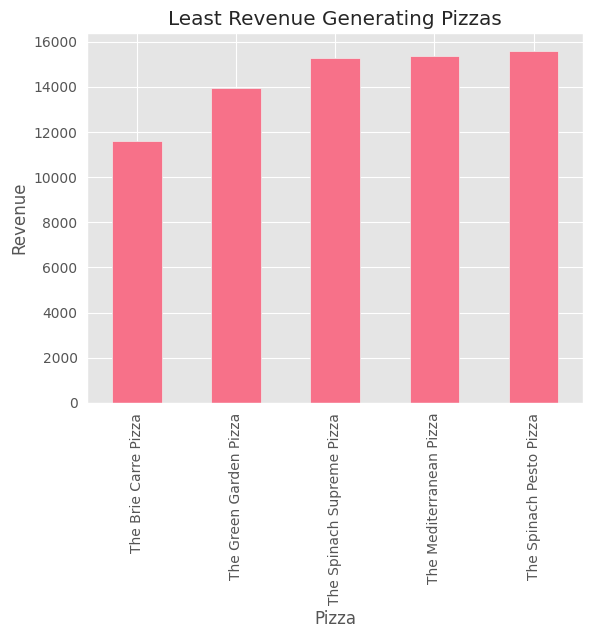

In [85]:
low_rev.plot(kind='bar')

plt.title('Least Revenue Generating Pizzas')
plt.xlabel('Pizza')
plt.ylabel('Revenue')
plt.show()

Ingredient Insight

In [86]:
top_names = top_rev.index
df[df['name'].isin(top_names)]['ingredients'].value_counts().head(10)


,count
ingredients,
"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon",2416
"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",2372
"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce",2315
"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",2302
"Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic",1887


Correlation Between Price and Quantity

In [87]:
df[['price','quantity']].corr()


,price,quantity
price,1.000000,0.007142
quantity,0.007142,1.000000


In [88]:
df['revenue'] = df['quantity'] * df['price']


In [89]:
corr_data = df[['price', 'quantity', 'revenue']]
corr = corr_data.corr()
corr


,price,quantity,revenue
price,1.000000,0.007142,0.836087
quantity,0.007142,1.000000,0.541926
revenue,0.836087,0.541926,1.000000


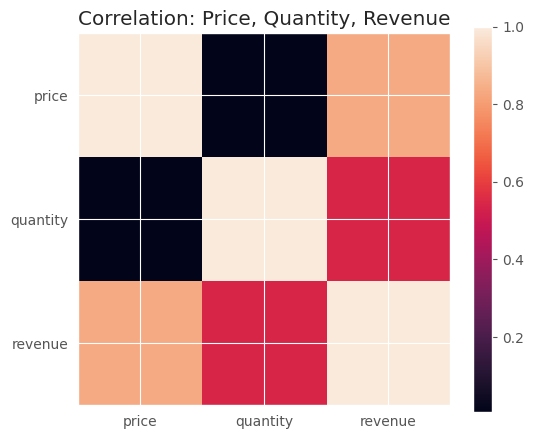

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title('Correlation: Price, Quantity, Revenue')
plt.show()
